In [3]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import statsmodels.api
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib
import shap
import warnings
warnings.filterwarnings('ignore')

## Etape 1 : Exploration de Données

In [4]:
df = pd.read_csv("bankchurn.csv")
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647311,Hill,608,Spain,Female,41.0,1.0,83807.86,1,0,1,112542.58,0
1,15619304,Onio,502,France,Female,42.0,8.0,159660.80,3,1,0,113931.57,1
2,15701354,Boni,699,France,Female,39.0,1.0,0.00,2,0,0,93826.63,0
3,15737888,Mitchell,850,Spain,Female,43.0,2.0,125510.82,1,1,1,79084.10,0
4,15574012,Chu,645,Spain,Male,44.0,8.0,113755.78,2,1,0,149756.71,1


In [4]:
print(df.shape)
display(df.info())
display(df.describe(include = "all"))

(9999, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9999 non-null   int64  
 1   Surname          9787 non-null   object 
 2   CreditScore      9999 non-null   int64  
 3   Geography        9999 non-null   object 
 4   Gender           9999 non-null   object 
 5   Age              9977 non-null   object 
 6   Tenure           9509 non-null   float64
 7   Balance          9999 non-null   float64
 8   NumOfProducts    9999 non-null   int64  
 9   HasCrCard        9999 non-null   int64  
 10  IsActiveMember   9999 non-null   int64  
 11  EstimatedSalary  9999 non-null   float64
 12  Exited           9999 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 1015.6+ KB


None

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9.999000e+03,9787,9999.000000,9999,9999,9977,9509.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.00000
unique,NaN,2919,NaN,3,2,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5013,5457,478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569095e+07,NaN,650.531953,NaN,NaN,NaN,4.756126,76493.538642,1.530253,0.705471,0.515052,100090.114004,0.20362
std,7.193758e+04,NaN,96.657618,NaN,NaN,NaN,2.729100,62395.836502,0.581659,0.455854,0.499798,57513.367468,0.40271
min,1.556570e+07,NaN,350.000000,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.00000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,NaN,2.000000,0.000000,1.000000,0.000000,0.000000,50992.930000,0.00000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,NaN,5.000000,97208.460000,1.000000,1.000000,1.000000,100187.430000,0.00000
75%,1.575324e+07,NaN,718.000000,NaN,NaN,NaN,7.000000,127646.040000,2.000000,1.000000,1.000000,149392.065000,0.00000


In [5]:
df["Age"] = df["Age"].astype(float)

ValueError: could not convert string to float: '8?'

In [6]:
# Type of variable Age

#df["Age"] = df["Age"].astype(float)

def wrong_type(x):
    try:
        float(x)
    except ValueError:
        return x

print(df["Age"].apply(wrong_type).loc[df["Age"].apply(wrong_type).notna()])
df["Age"] = df["Age"].str.replace("?", "0").astype(float)

765    8?
Name: Age, dtype: object


In [7]:
# Missing values

display(df.isna().sum())
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Tenure"] = df["Tenure"].fillna(df["Tenure"].median())

CustomerId           0
Surname            212
CreditScore          0
Geography            0
Gender               0
Age                 22
Tenure             490
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
# Duplicates

df.duplicated().sum()

0

## Etape 2 : Analyse de Données avec la DataVizualization

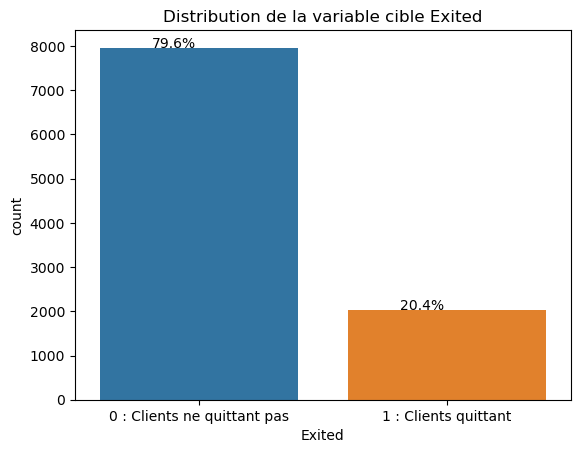

In [14]:
ax1 = sns.countplot(x = "Exited", data = df)

total = len(df["Exited"])
for p in ax1.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.1
    ax1.text(x, y, percentage, ha = 'center')

plt.title("Distribution de la variable cible Exited", fontsize = 12)
plt.xticks(ticks = range(2), labels = ["0 : Clients ne quittant pas", "1 : Clients quittant"]);

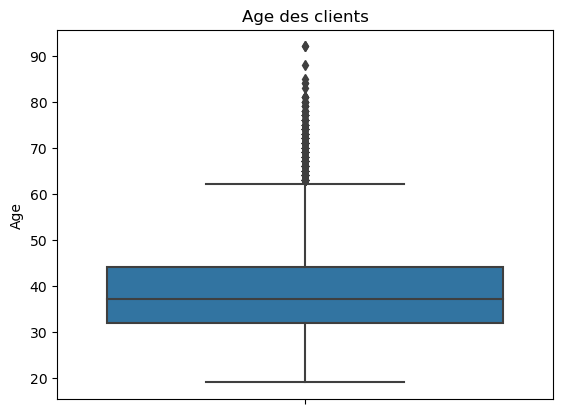

In [15]:
sns.boxplot(y = "Age", data = df)
plt.title("Age des clients", fontsize = 12);

In [16]:
Q1 = df["Age"].quantile(0.25)
Q3 = df["Age"].quantile(0.75)
IQR = Q3 - Q1
inf = Q1 - 1.5 * IQR
sup = Q3 + 1.5 * IQR

df[(df["Age"] < inf) | (df["Age"] > sup)]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
57,15623944,T'ien,511,Spain,Female,66.0,4.0,0.00,1,1,0,1643.11,1
84,15805254,Ndukaku,652,Spain,Female,75.0,5.0,0.00,2,1,1,114675.75,0
103,15804919,Dunbabin,670,Spain,Female,65.0,1.0,0.00,1,1,1,177655.68,1
157,15589975,Maclean,646,France,Female,73.0,6.0,97259.25,1,0,1,104719.66,0
180,15789669,Hsia,510,France,Male,65.0,2.0,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9752,15705174,Chiedozie,656,Germany,Male,68.0,7.0,153545.11,1,1,1,186574.68,0
9764,15777067,Thomas,445,France,Male,64.0,2.0,136770.67,1,0,1,43678.06,0
9831,15814690,Chukwujekwu,595,Germany,Female,64.0,2.0,105736.32,1,1,1,89935.73,1
9893,15704795,Vagin,521,France,Female,77.0,6.0,0.00,2,1,1,49054.10,0


In [17]:
df["Age"].describe([0.01, 0.25, 0.5, 0.75, 0.99])

count    9999.000000
mean       38.963096
std        10.441769
min        19.000000
1%         21.000000
25%        32.000000
50%        37.000000
75%        44.000000
99%        72.000000
max        92.000000
Name: Age, dtype: float64

In [ ]:
df = df.loc[df["Age"] < 72]

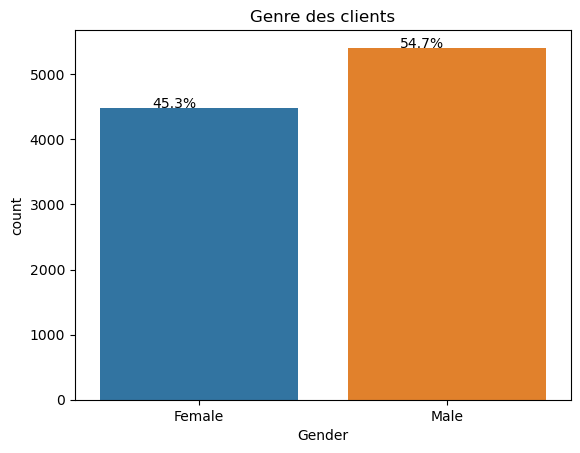

In [19]:
ax2 = sns.countplot(x = "Gender", data = df)

total = len(df["Gender"])
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.1
    ax2.text(x, y, percentage, ha = 'center')
    
plt.title("Genre des clients", fontsize = 12);

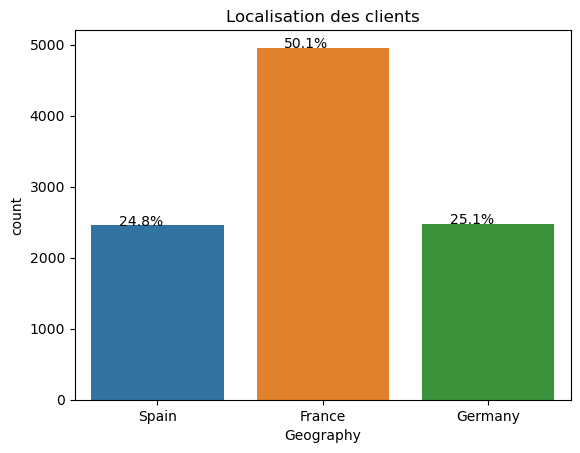

In [20]:
ax3 = sns.countplot(x = "Geography", data = df)

total = len(df["Geography"])
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.1
    ax3.text(x, y, percentage, ha = 'center')

plt.title("Localisation des clients", fontsize = 12);

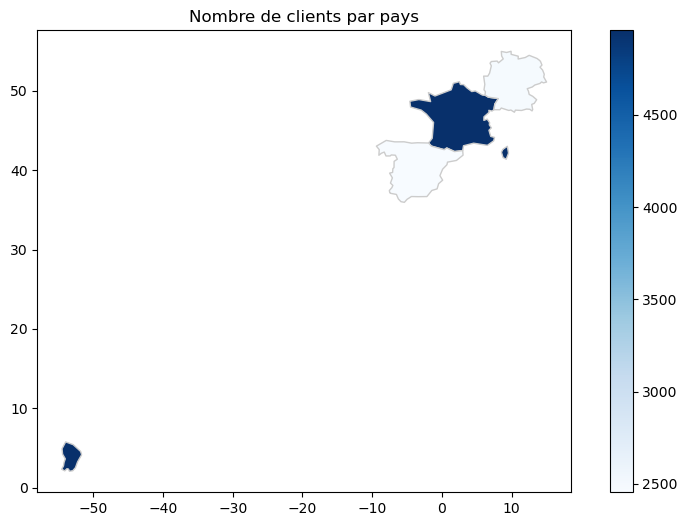

In [9]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
modality_count = df.groupby("Geography").size().reset_index(name = "observations_count")
df_world = world.merge(modality_count, left_on = "name", right_on = "Geography")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
df_world.plot(column = "observations_count", cmap = "Blues", edgecolor = "0.8", legend = True, ax = ax)
ax.set_title("Nombre de clients par pays");

In [9]:
df["Surname"].value_counts().head(10)

Smith      32
Scott      29
Walker     28
Maclean    24
Wright     24
Ma         23
Wilson     23
White      23
Fanucci    23
Lu         22
Name: Surname, dtype: int64

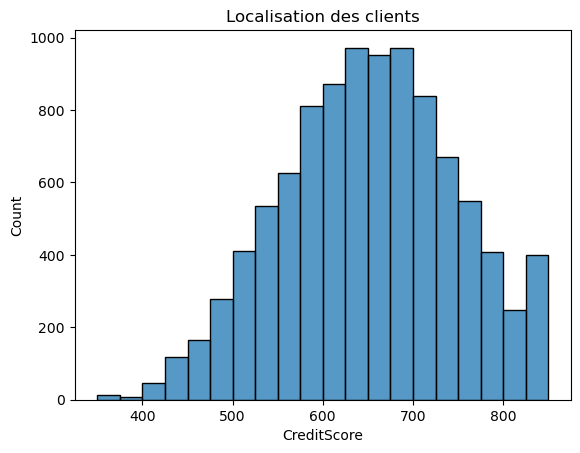

In [21]:
sns.histplot(x = "CreditScore", data = df, bins = 20)
plt.title("Localisation des clients", fontsize = 12);

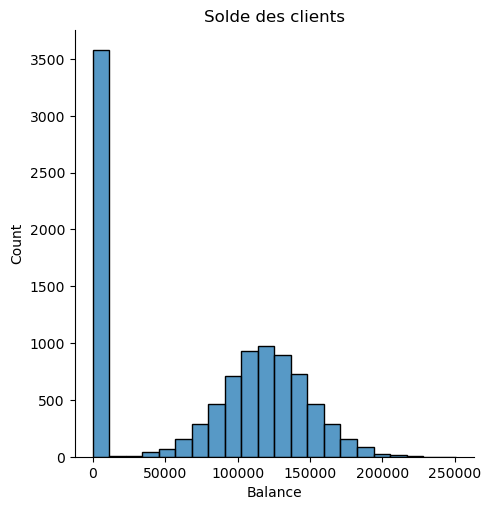

In [22]:
sns.displot(x = "Balance", data = df)
plt.title("Solde des clients", fontsize = 12);

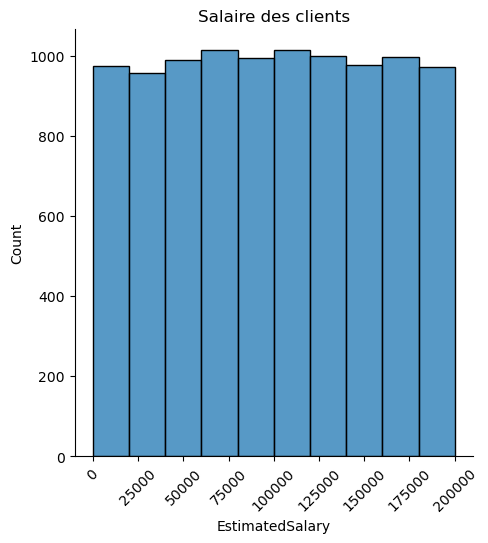

In [23]:
sns.displot(x = "EstimatedSalary", data = df, bins = 10)
plt.xticks(rotation = 45)
plt.title("Salaire des clients", fontsize = 12);

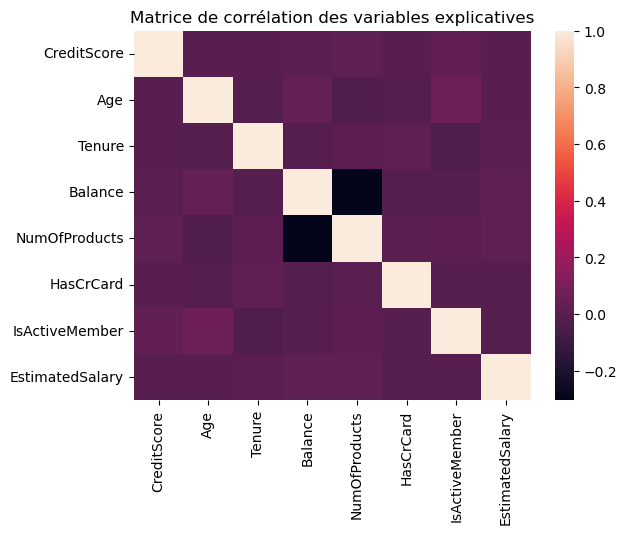

In [24]:
sns.heatmap(df.iloc[:, 2:-1].corr())
plt.title("Matrice de corrélation des variables explicatives");

,df,sum_sq,mean_sq,F,PR(>F)
Age,1.0,169.823692,169.823692,1162.594654,5.089348e-241
Residual,9891.0,1444.808068,0.146073,NaN,NaN


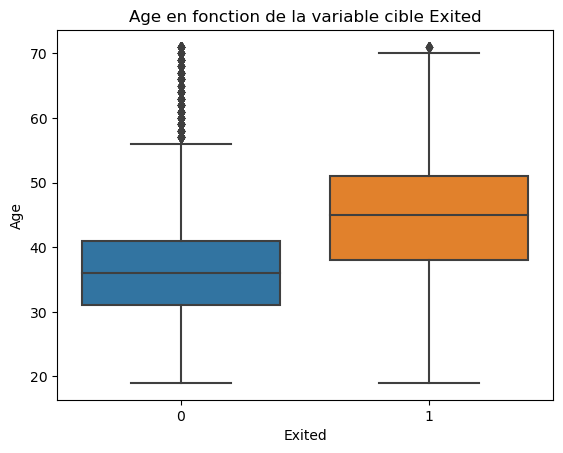

In [26]:
result = statsmodels.formula.api.ols('Exited ~ Age', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
display(table)

sns.boxplot(x = "Exited", y = "Age", data = df)
plt.title("Age en fonction de la variable cible Exited");

2.91145097411517e-26


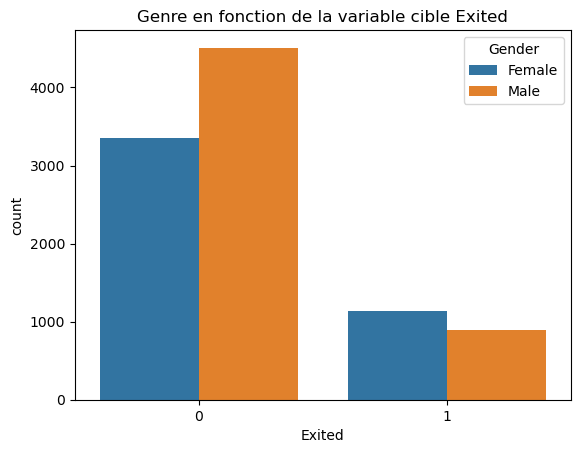

In [27]:
ct = pd.crosstab(df['Exited'], df['Gender'])
print(chi2_contingency(ct)[1])

sns.countplot(x = "Exited", hue = "Gender", data = df)
plt.title("Genre en fonction de la variable cible Exited");

PearsonRResult(statistic=0.11900226280844976, pvalue=1.556411393240676e-32)


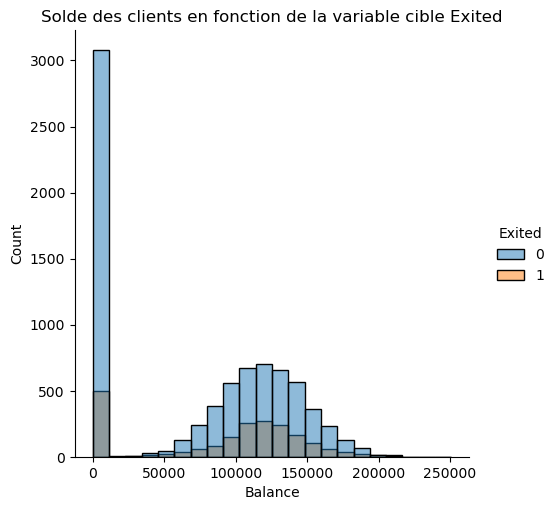

In [28]:
print(pearsonr(x = df["Exited"], y = df["Balance"]))

sns.displot(x = "Balance", hue = "Exited", data = df)
plt.title("Solde des clients en fonction de la variable cible Exited", fontsize = 12);

In [36]:
df.loc[df["Exited"] == 0]["Balance"].describe((0.01, 0.25, 0.5, 0.75, 0.99))

count      7861.000000
mean      72777.705909
std       62868.407184
min           0.000000
1%            0.000000
25%           0.000000
50%       92072.680000
75%      126444.080000
99%      183754.376000
max      221532.800000
Name: Balance, dtype: float64

In [38]:
df.loc[df["Exited"] == 1]["Balance"].describe((0.01, 0.25, 0.5, 0.75, 0.99))

count      2032.000000
mean      91159.776334
std       58346.172756
min           0.000000
1%            0.000000
25%       39093.627500
50%      109410.880000
75%      131435.375000
99%      197520.678900
max      250898.090000
Name: Balance, dtype: float64

PearsonRResult(statistic=0.011671521540836867, pvalue=0.2457297753139092)


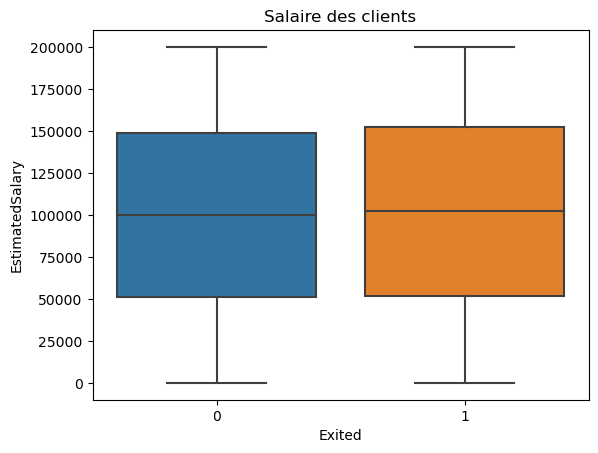

In [29]:
print(pearsonr(x = df["Exited"], y = df["EstimatedSalary"]))

sns.boxplot(x = "Exited", y = "EstimatedSalary", data = df)
plt.title("Salaire des clients", fontsize = 12);

## Etape 3 : Preprocessing

In [30]:
# Variables Selection

df = df.drop(["CustomerId", "Surname", "EstimatedSalary"], axis = 1)

In [31]:
# Encode non-ordinal categorical variables

df = pd.get_dummies(df)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,608,41.0,1.0,83807.86,1,0,1,0,0,0,1,1,0
1,502,42.0,8.0,159660.80,3,1,0,1,1,0,0,1,0
2,699,39.0,1.0,0.00,2,0,0,0,1,0,0,1,0
3,850,43.0,2.0,125510.82,1,1,1,0,0,0,1,1,0
4,645,44.0,8.0,113755.78,2,1,0,1,0,0,1,0,1


In [32]:
# Create dataframe of features and target variable

X = df.drop("Exited", axis = 1)
y = df["Exited"]

# Split the data between train set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Standardize the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Etape 4 : Modélisation

In [27]:
# Instanciate models

model_lr = LogisticRegression()
model_svc = SVC()
model_knn = KNeighborsClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier()
model_cb = CatBoostClassifier(verbose = False)
model_lgbm = LGBMClassifier()
models = [model_lr, model_svc, model_knn, model_rf, model_gb, model_cb, model_lgbm]

# Train models and evaluate their performances

for model in models :
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(model.score(X_test_scaled, y_test))
    print(classification_report(y_test, y_pred))
    print(pd.crosstab(y_test, y_pred, rownames=['True values'], colnames=['Predicted values']))

0.8206666666666667
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      2429
           1       0.58      0.22      0.32       571

    accuracy                           0.82      3000
   macro avg       0.71      0.59      0.61      3000
weighted avg       0.79      0.82      0.79      3000

Predicted values     0    1
True values                
0                 2338   91
1                  447  124
0.864
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2429
           1       0.81      0.37      0.51       571

    accuracy                           0.86      3000
   macro avg       0.84      0.68      0.72      3000
weighted avg       0.86      0.86      0.84      3000

Predicted values     0    1
True values                
0                 2380   49
1                  359  212
0.8396666666666667
              precision    recall  f1-score   support

           0       0.87

In [28]:
# Optimization of CatBoostClassifier

class_weights = [1 / len(y_train[y_train == 0]), 1 / len(y_train[y_train == 1])]
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [6, 8, 10]
}

model_cb_weighted = CatBoostClassifier(verbose = False, class_weights = class_weights)
grid_search_cb = GridSearchCV(estimator = model_cb_weighted, param_grid = param_grid, scoring = 'recall', cv = 3)
grid_search_cb.fit(X_train_scaled, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000018F79A6FAC0>,
             param_grid={'depth': [6, 8, 10], 'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='recall')

In [38]:
# Save model

import joblib

joblib.dump(grid_search_cb, "CatBoost")

In [37]:
import joblib

grid_search_cb = joblib.load("CatBoost")

In [39]:
y_pred_cb = grid_search_cb.predict(X_test_scaled)
print(grid_search_cb.score(X_test_scaled, y_test))
print(classification_report(y_test, y_pred_cb))
print(pd.crosstab(y_test, y_pred_cb, rownames=['True values'], colnames=['Predicted values']))

0.7443082311733801
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2429
           1       0.47      0.74      0.57       571

    accuracy                           0.79      3000
   macro avg       0.70      0.77      0.72      3000
weighted avg       0.84      0.79      0.81      3000

Predicted values     0    1
True values                
0                 1945  484
1                  146  425


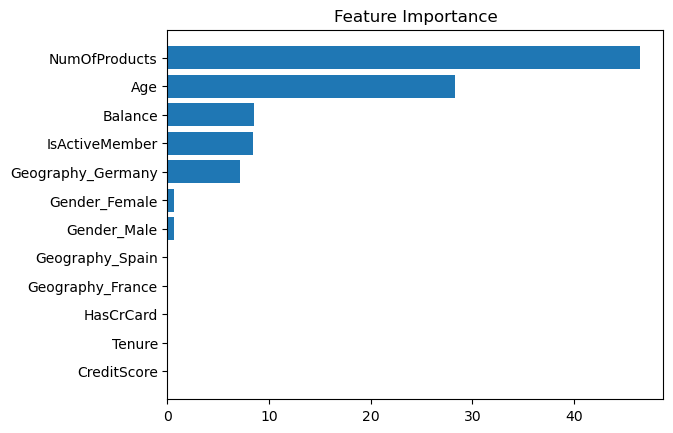

In [40]:
best_model = grid_search_cb.best_estimator_
best_model.fit(X_train_scaled, y_train)

features_imp = best_model.get_feature_importance(type = 'FeatureImportance')
sorted_idx = np.argsort(features_imp)

fig = plt.figure()
plt.barh(range(len(sorted_idx)), features_imp[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

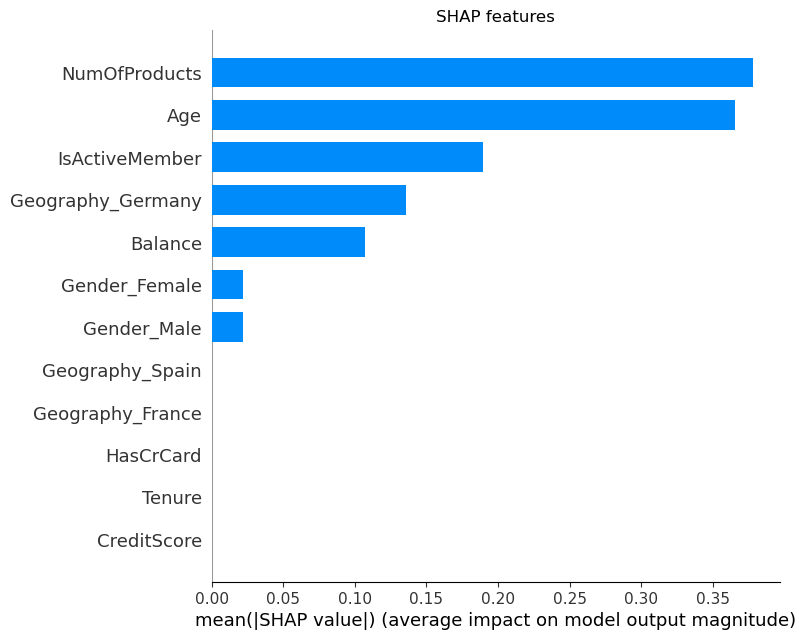

In [32]:
# Interpretability

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_scaled)
shap.summary_plot(shap_values, X_test, plot_type="bar", show = 0)
plt.title("SHAP features");

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
5344,806,34.0,6.0,0.0,2,0,0,1,0,0,0,1
7444,516,45.0,4.0,0.0,1,1,0,1,0,0,1,0


[ 0.88504609  0.94862807  0.09363109  0.72368817 -0.90424929  0.64760138
 -1.02093636  0.99501173 -0.57630539 -0.57454558 -0.91382782  0.91382782]


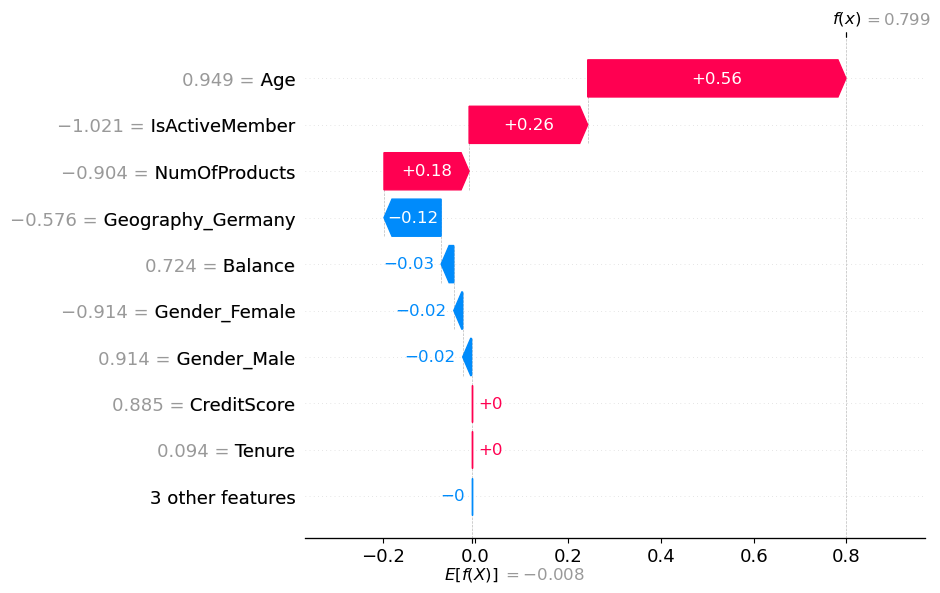

In [45]:
# Focus on a client with only 1 product and which is not active

display(X_test.head(2))
print(X_test_scaled[2])
shap.waterfall_plot(shap.Explanation(values=shap_values[2], base_values=explainer.expected_value, data=X_test_scaled[2], feature_names = X.columns))